In [97]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# • Q1
### Read the data for January. How many records are there?

In [2]:
df = pd.read_parquet('fhv_tripdata_2021-01.parquet')
print('Q1: There are', df.shape[0], 'records in the January data')

Q1: There are 1154112 records in the January data


# • Q2
### What's the average trip duration in January?

In [8]:
df['duration'] = df['dropOff_datetime'] - df['pickup_datetime']
df['duration'] = df.duration.apply(lambda td: td.total_seconds() / 60)
print('Q2: The average trip duration in January was:', df['duration'].mean().round(3))

Q2: The average trip duration in January was: 19.167


In [28]:
df_wo_outliers = df[(df.duration >= 1) & (df.duration <= 60)]

### How many records did you drop?

C:\Users\gpires\Gabriel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


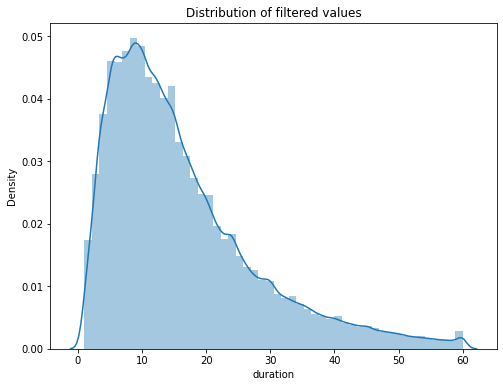

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(df_wo_outliers.duration)
plt.title('Distribution of filtered values')
plt.show()

C:\Users\gpires\Gabriel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


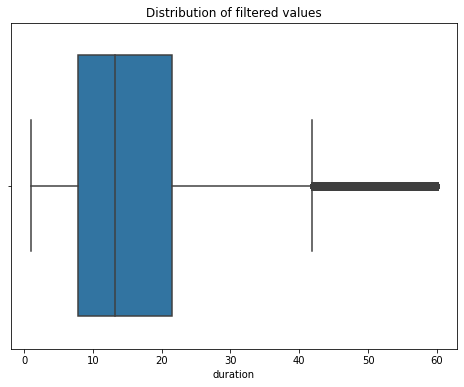

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(df_wo_outliers.duration)
plt.title('Distribution of filtered values')
plt.show()

In [35]:
print(df.shape[0] - df_wo_outliers.shape[0], 'records was dropped.')

44286 records was dropped.


# • Q3
### What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

In [83]:
df_wo_outliers[['PUlocationID', 'DOlocationID']] = df_wo_outliers[['PUlocationID','DOlocationID']].fillna(value=-1)
print('There are {:,.1f}% missing values, filled with -1.'.format(((df_wo_outliers[df_wo_outliers['PUlocationID'] == -1].shape[0] / df_wo_outliers.shape[0]) * 100)))

There are 83.5% missing values, filled with -1.


C:\Users\gpires\AppData\Local\Temp\ipykernel_4588\2297512854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_outliers[['PUlocationID', 'DOlocationID']] = df_wo_outliers[['PUlocationID','DOlocationID']].fillna(value=-1)


# • Q4
###  What's the dimensionality of this matrix? (The number of columns).

In [92]:
categorical = ['PUlocationID', 'DOlocationID']
df_wo_outliers[categorical] = df_wo_outliers[categorical].astype(str)

train_dicts = df_wo_outliers[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

print('The matrix dimensionality is:',X_train.shape[1])

C:\Users\gpires\AppData\Local\Temp\ipykernel_4588\1510727951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_outliers[categorical] = df_wo_outliers[categorical].astype(str)


The matrix dimensionality is: 525


# • Q5
### What's the RMSE on train?

In [101]:
target = 'duration'
y_train = df_wo_outliers[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print('The RMSE for training was:', mean_squared_error(y_train, y_pred, squared=False).round(3))

The RMSE for training was: 10.529


# • Q6
### What's the RMSE on validation?

In [110]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df['dropOff_datetime'] - df['pickup_datetime']
    df['duration'] = df.duration.apply(lambda td: td.total_seconds() / 60)

    df_wo_outliers = df[(df.duration >= 1) & (df.duration <= 60)]

    df_wo_outliers[['PUlocationID', 'DOlocationID']] = df_wo_outliers[['PUlocationID','DOlocationID']].fillna(value=-1)
    
    categorical = ['PUlocationID', 'DOlocationID']
    df_wo_outliers[categorical] = df_wo_outliers[categorical].astype(str)
    
    return df_wo_outliers

In [112]:
df_train = read_dataframe('fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('fhv_tripdata_2021-02.parquet')

C:\Users\gpires\AppData\Local\Temp\ipykernel_4588\2318464649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_outliers[['PUlocationID', 'DOlocationID']] = df_wo_outliers[['PUlocationID','DOlocationID']].fillna(value=-1)
C:\Users\gpires\AppData\Local\Temp\ipykernel_4588\2318464649.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_outliers[categorical] = df_wo_outliers[categorical].astype(str)
C:\Users\gpires\AppData\Local\Temp\ipykernel_4588\2318464649.py:9: SettingWithCopyWarning: 
A value

In [121]:
categorical = ['PUlocationID', 'DOlocationID']
df_train[categorical] = df_train[categorical].astype(str)
df_val[categorical] = df_val[categorical].astype(str)

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print('The RMSE for testing was:', mean_squared_error(y_val, y_pred, squared=False).round(3))

The RMSE for testing was: 11.014
